# Authors
            Rutvik pansare
            Praksha Maheshwari
            Vishal Phaugat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

In [2]:
# connection with database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rutu12345",
  database="project"
)
# Query to extract data from the database
query = "SELECT * FROM project.crime_data;"
df = pd.read_sql(query,mydb)

mydb.close() #close the connection



In [3]:
# convert date string to datetime format
from datetime import datetime
year_query = df.copy()
dates =[]
year_query['CMPLNT_FR_DT'] = pd.to_datetime(year_query['CMPLNT_FR_DT'])
year_query['YEAR'] = pd. DatetimeIndex(year_query['CMPLNT_FR_DT']).year

In [4]:
clean  = pd.read_csv("clean.csv")

clean['date'] =  year_query['CMPLNT_FR_DT']
clean['BORO_NM'] =  year_query['BORO_NM']
clean['CMPLNT_NUM'] =  year_query['CMPLNT_NUM']

linear = clean.copy()

linear.head()

vis1 = linear.groupby(["date",'BORO_NM']).sum().reset_index()

vis1.drop(["CMPLNT_FR_TM",'YEAR','SUSP_AGE_GROUP'],axis = 1,inplace = True)

vis2 = linear.groupby(["date",'BORO_NM'])['CMPLNT_NUM'].count().reset_index()

vis1['Total'] = vis2['CMPLNT_NUM']






# label encoding the target column- In this case, Boroughs are the target columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = vis1
dfle.SUSP_AGE_GROUP = le.fit_transform(dfle.BORO_NM)
dfle

for i in ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']:
    new_column = []
    for j in dfle[i]:
        if j == 0.0:
            new_column.append(0)
        else:
            new_column.append(1)
    dfle[i]=new_column

<ipython-input-4-73bdf5f6b12e>:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfle.SUSP_AGE_GROUP = le.fit_transform(dfle.BORO_NM)


In [17]:
import statsmodels.api as sm
X = dfle.drop(['Total','date'],axis = 1)
y = dfle['Total']
X=X.drop({"BORO_NM","Longitude"},axis = 1)
dfle.head()

,date,BORO_NM,Unnamed: 0,CMPLNT_FR_DT,Latitude,Longitude,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,...,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION,Total
0,2006-01-01,BRONX,61840648,84,3430.932198,-6206.715154,13,71,0,31,...,0,1,0,0,0,0,23,32,29,84
1,2006-01-01,BROOKLYN,112843006,113,4594.350623,-8356.006188,15,98,2,50,...,0,0,1,0,0,0,31,50,32,113
2,2006-01-01,MANHATTAN,69793641,74,3018.392478,-5473.137676,15,59,1,20,...,0,0,0,1,0,0,21,32,21,74
3,2006-01-01,QUEENS,78522285,89,3622.900532,-6571.333967,18,70,8,30,...,0,0,0,0,1,0,29,42,18,89
4,2006-01-01,STATEN ISLAND,19419668,23,934.003716,-1704.591111,3,19,1,1,...,0,0,0,0,0,1,5,14,4,23


In [18]:
X = sm.add_constant(X)

In [19]:
## fit a OLS model with intercept on TV and Radio

model= sm.OLS(y, X).fit()

In [20]:
import matplotlib.pyplot as plt
X.iloc[:,1:].corr()


,Unnamed: 0,CMPLNT_FR_DT,Latitude,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC,...,SYNAGOGUE,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION
Unnamed: 0,1.000000,0.796015,0.996430,0.953840,0.992223,0.571384,0.863565,0.610616,0.700130,0.810873,...,0.137618,0.261080,0.177665,0.338988,0.083962,0.049961,-0.390855,0.954653,0.977732,0.837060
CMPLNT_FR_DT,0.796015,1.000000,0.798501,0.766635,0.793471,0.472518,0.687601,0.501506,0.574476,0.647864,...,0.102180,0.202980,0.139111,0.263877,0.066600,0.039173,-0.305721,0.774590,0.777751,0.673267
Latitude,0.996430,0.798501,1.000000,0.957249,0.995776,0.572145,0.866265,0.615289,0.701037,0.815347,...,0.137676,0.262379,0.180956,0.338787,0.084178,0.049442,-0.392715,0.957744,0.981340,0.840209
SUS_F,0.953840,0.766635,0.957249,1.000000,0.927574,0.532608,0.848449,0.599049,0.674897,0.781326,...,0.127291,0.252552,0.174002,0.339574,0.069332,0.030386,-0.355953,0.912939,0.934363,0.825342
SUS_M,0.992223,0.793471,0.995776,0.927574,1.000000,0.573435,0.858595,0.608719,0.696089,0.811693,...,0.138556,0.260296,0.180590,0.336653,0.083586,0.055886,-0.398199,0.954447,0.978761,0.830838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QUEENS,0.049961,0.039173,0.049442,0.030386,0.055886,0.586158,-0.048344,-0.178724,0.136535,0.115801,...,-0.009494,-0.015581,-0.222692,-0.222692,-0.222692,1.000000,-0.222585,0.055403,0.014784,0.131493
STATEN ISLAND,-0.390855,-0.305721,-0.392715,-0.355953,-0.398199,-0.277889,-0.430492,-0.324326,-0.085684,-0.441008,...,-0.046328,-0.081459,-0.222585,-0.222585,-0.222585,-0.222585,1.000000,-0.344141,-0.362116,-0.445943
FELONY,0.954653,0.774590,0.957744,0.912939,0.954447,0.599154,0.832022,0.521535,0.710869,0.727198,...,0.146284,0.253035,0.073151,0.344444,0.058691,0.055403,-0.344141,1.000000,0.914537,0.754633
MISDEMEANOR,0.977732,0.777751,0.981340,0.934363,0.978761,0.522383,0.804648,0.639579,0.648195,0.807539,...,0.121713,0.265524,0.216743,0.261988,0.114335,0.014784,-0.362116,0.914537,1.000000,0.752119


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)


dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)


features_rank.columns=['Features','Score']
features_rank

features_rank.nlargest(10,'Score')

,Features,Score
1,Unnamed: 0,1.113952e+12
3,Latitude,5.260535e+07
2,CMPLNT_FR_DT,9.101777e+06
5,SUS_M,9.779396e+05
82,MISDEMEANOR,7.717735e+05
81,FELONY,4.550312e+05
73,STREET,4.428152e+05
7,BLACK,3.521482e+05
64,RESIDENCE - APT. HOUSE,2.997395e+05
4,SUS_F,2.875798e+05


<AxesSubplot:>

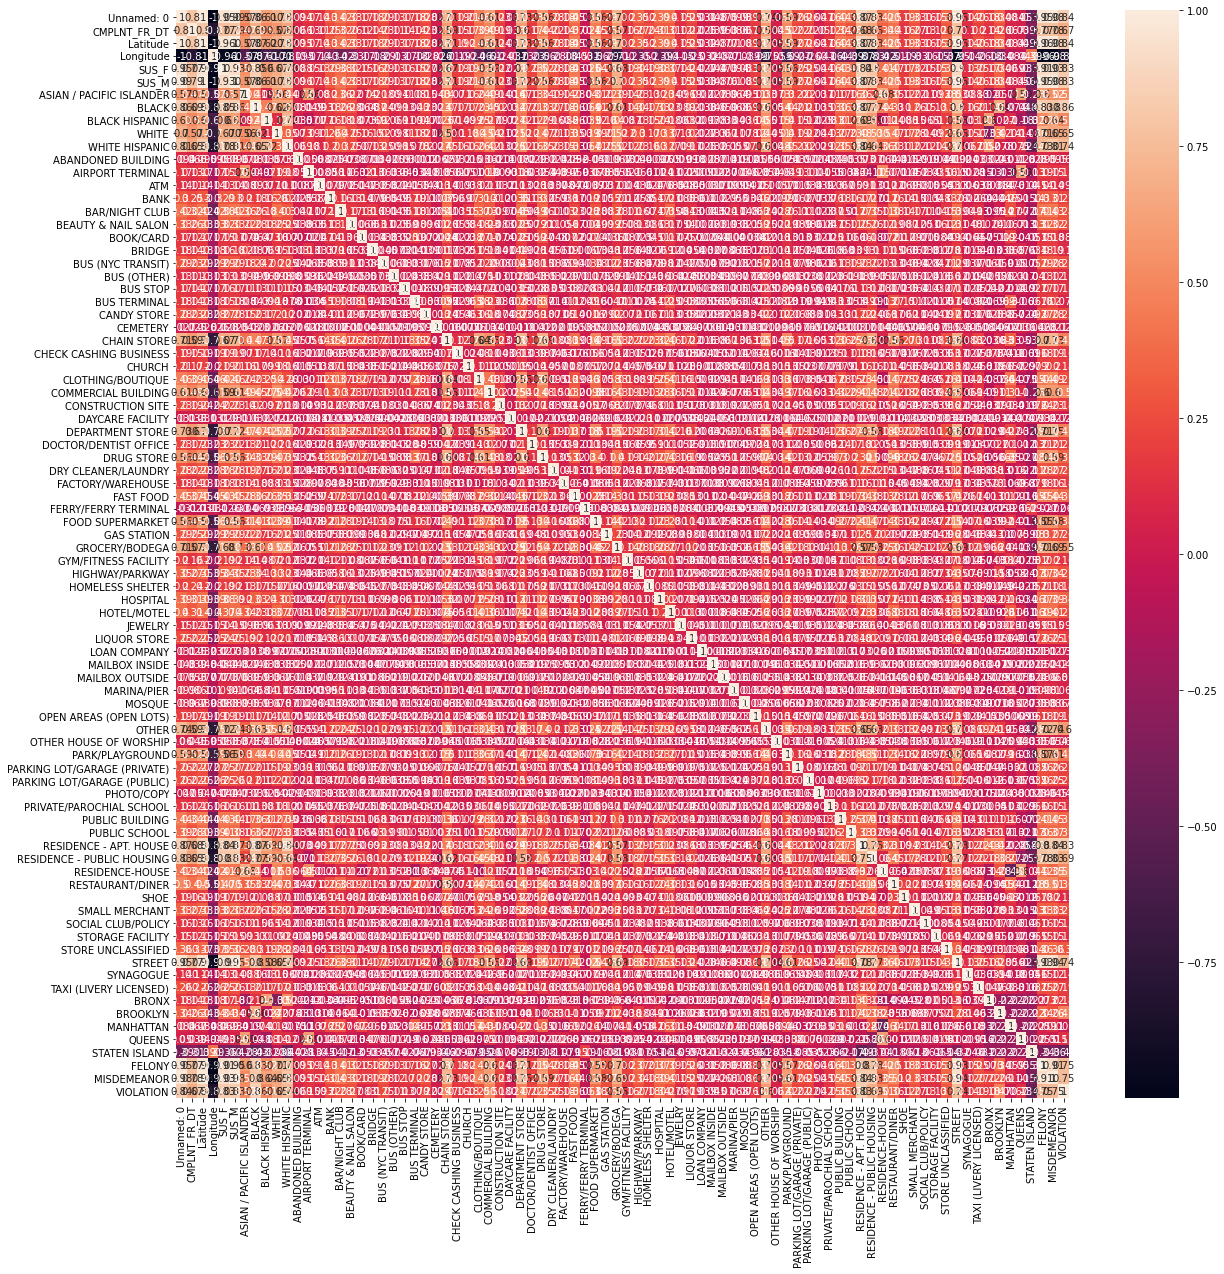

In [22]:
import seaborn as sns
corr=dfle.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(dfle[top_features].corr(),annot=True)

In [23]:
threshold=0.8

In [24]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
df = correlation(df.iloc[:,:-1],threshold)

In [ ]:
dfle1 = dfle.drop(df,axis=1)